# Regression metrics optimization (Video part 34)

### Goal:
- how to efficiently optimize metrics used for regression problems.




*remember that we can always use early stopping, so keep it in mind*


#### RMSE, MSE, R-Squared
- Most commonly used metric, so it is available in almost every library.
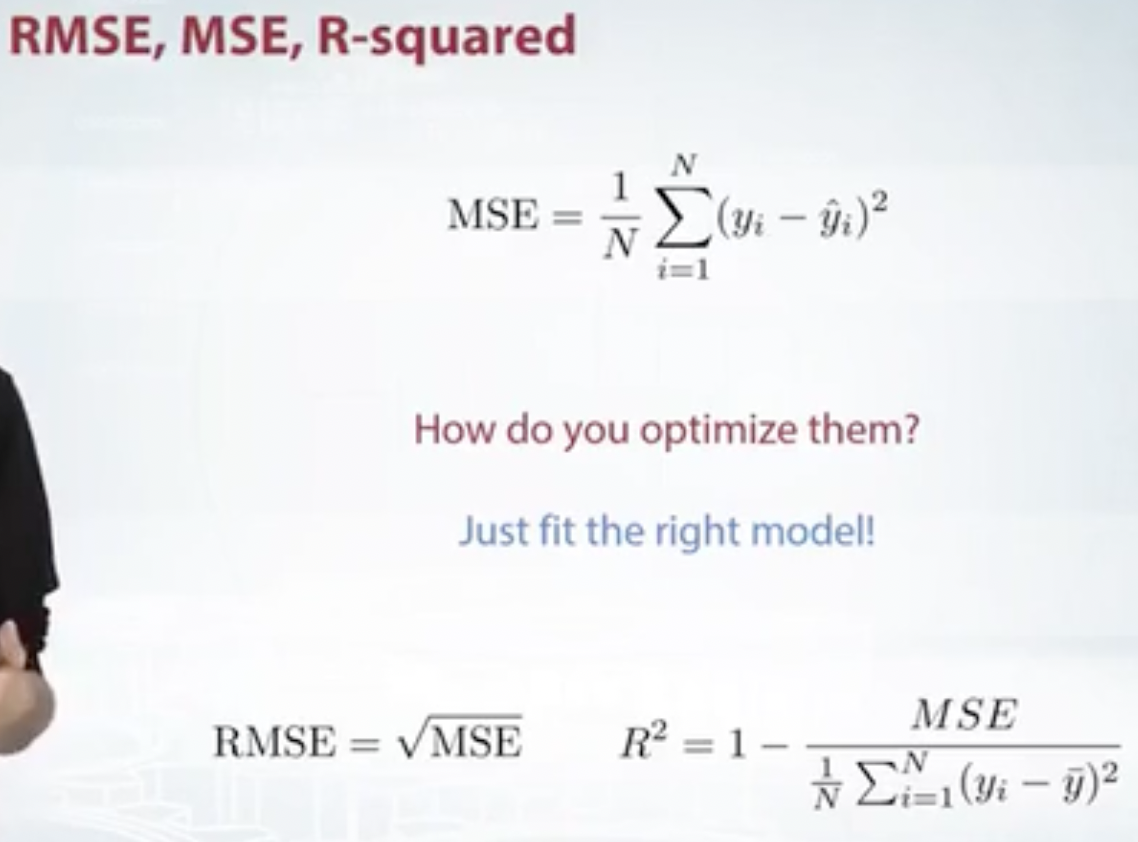
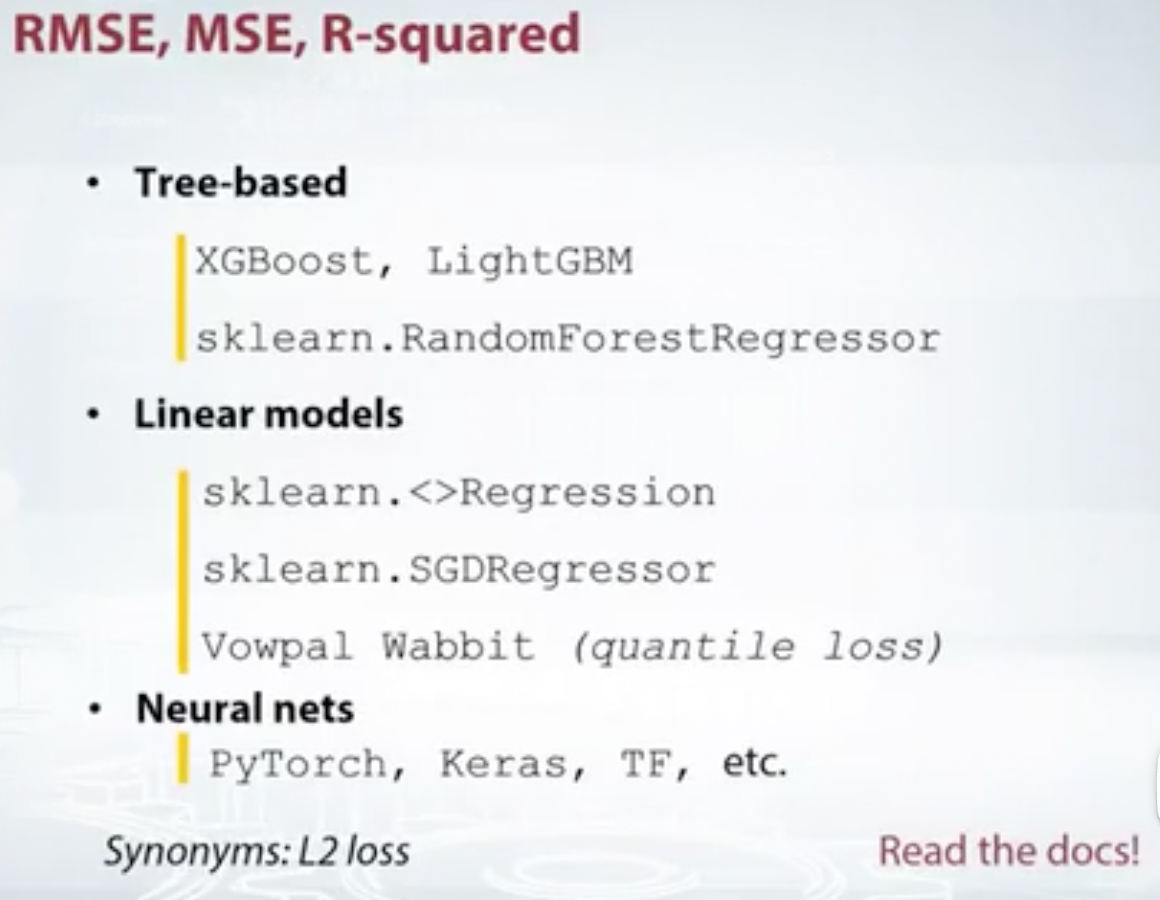

#### MAE
- Popular too, so it is easy to implement
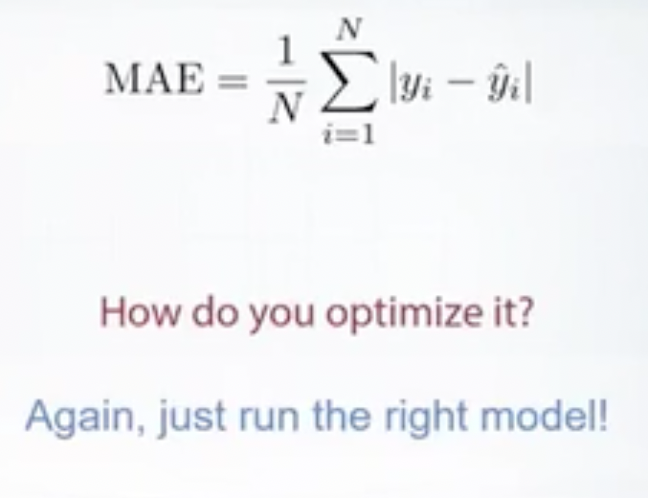
- Some libraries however do not support it. Eg XGBoost because MAE has zero as a second derivative. But LightGBM can, so you can still use gradient boosting decision trees with this metric.
- Some sklearn linear models can not optimize MAE natively, but we could use a very similar loss function called Huber Loss.
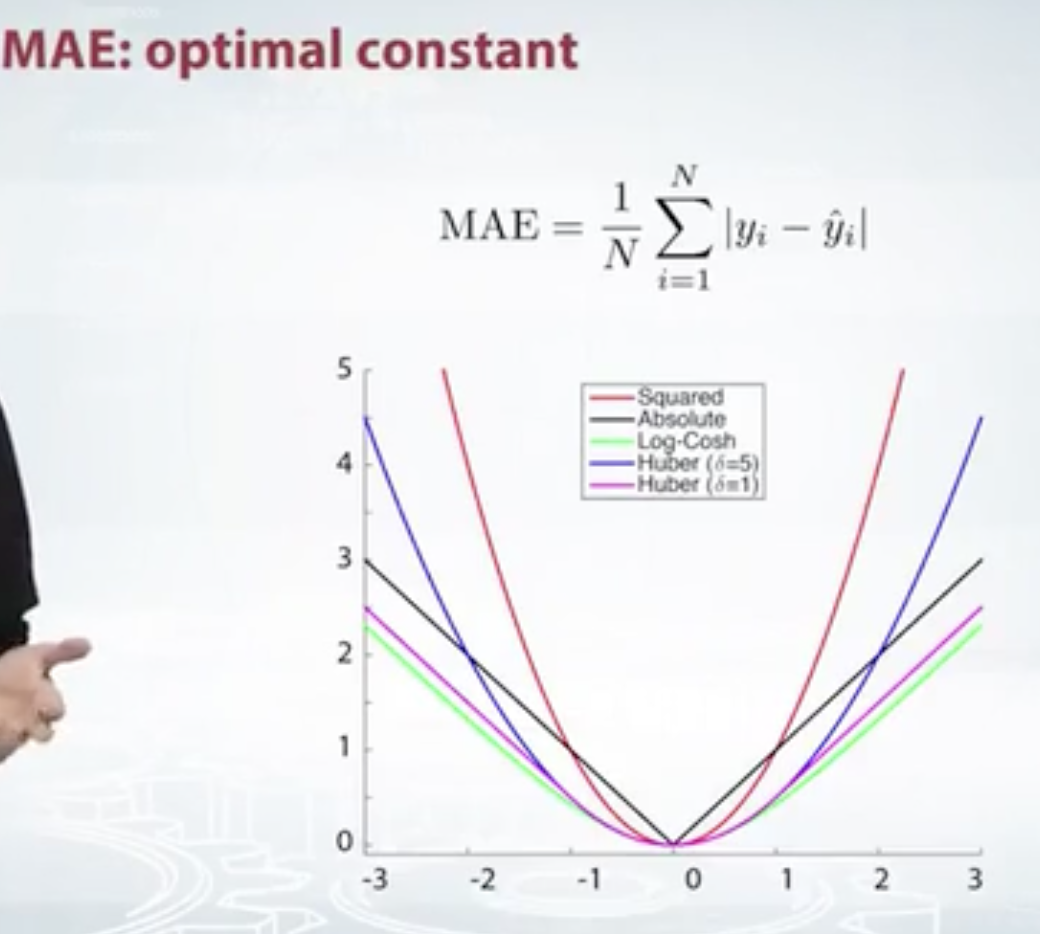
- Notice that MAE is the black line in the plot above, at the 90 degree right angle, it is non-differentiable, so this is why some libraries can not optimize it.
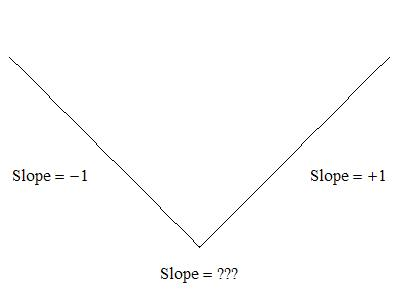![image.png]
- There are a lot of ways to make MAE smooth (so it is differentiable), we can actually make a similar function that have plot that looks similar to MAE error.
- Most famoud one is Huber Loss. It is basically combination of MAE and MSE. MSE is computed when the error is small, so we can safely approach zero errors. MAE is computed for large errors.

#### MSPE and MAPE
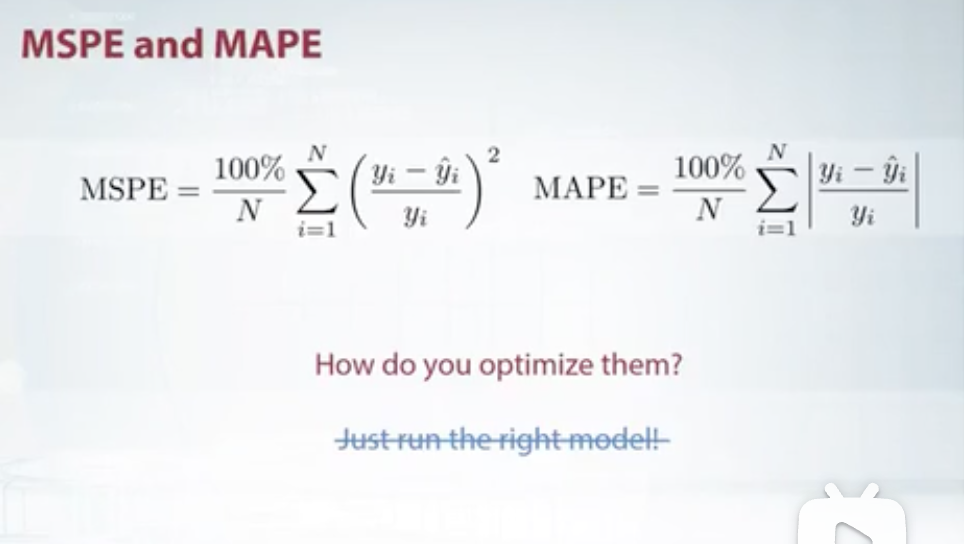
- Much harder to find models that can optimize them out of the box.
- There are several workarounds for this:
  1. Implement custom loss for lightgbm and neural networks.
  2. Optimize different metric and do early stopping.
  3. Use sample weights. This is possible because MSPE is a weighted version of MSE, and MAPE is a weighted version of MAE.
     - On the right side, we can the formula for sample weights. The denominator in the sample weights is just to ensure that the weights are summed up to 1, but it is not required.
     - Intuitively, sample weights tells the model how important an instance is during training.
     - So we can use sample weights. Say we want to optimize MSPE, we can actually set MSPE sample weights and optimize using MSE loss. So now the model will actually optimize desired MSPE loss.
  4. Resampling the train set using df.sample(weights=sample_weights calculated from the formula below) then use the build in MSE or MAE loss. The size of the new adta set is up to you - we can for example, sample twice as many instances as it was in the original train set. Note that we do not need to do anything on the test set, it stays as is. We usually need to resample many times, each time fitting a model and average these models predictions. We would get better score and more stable.
  5. If the errors are small, we can optimize the predictions in logarithmic scale.
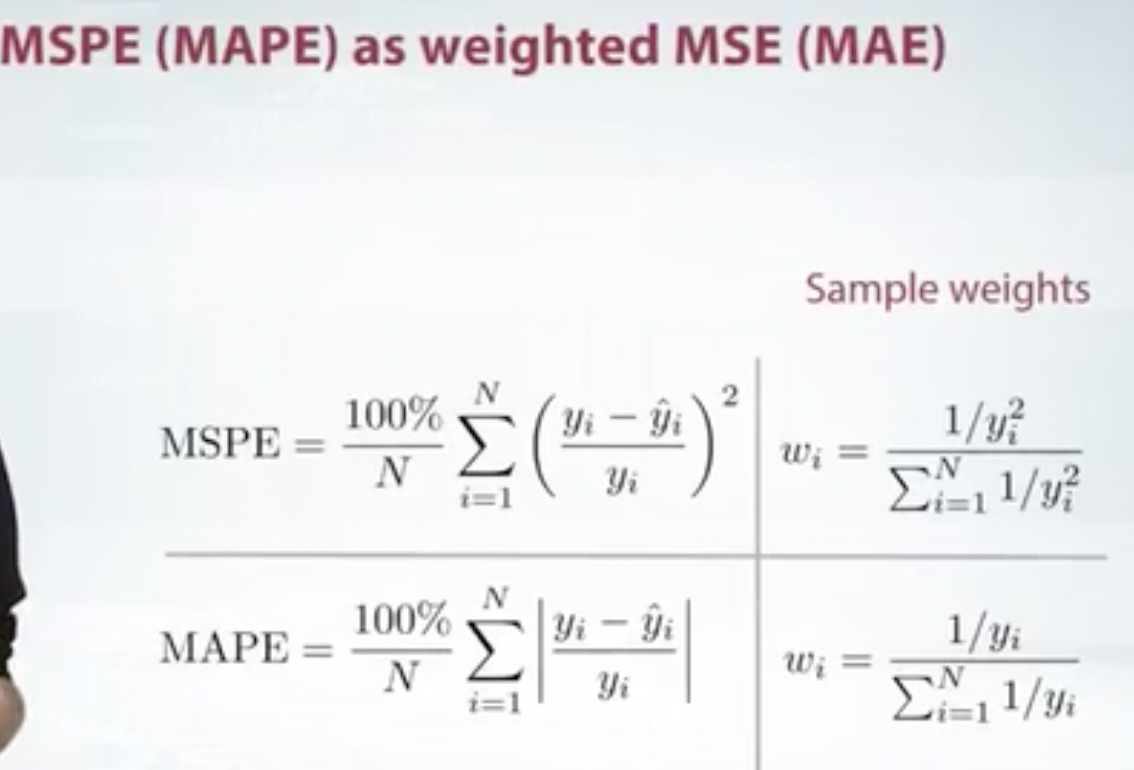
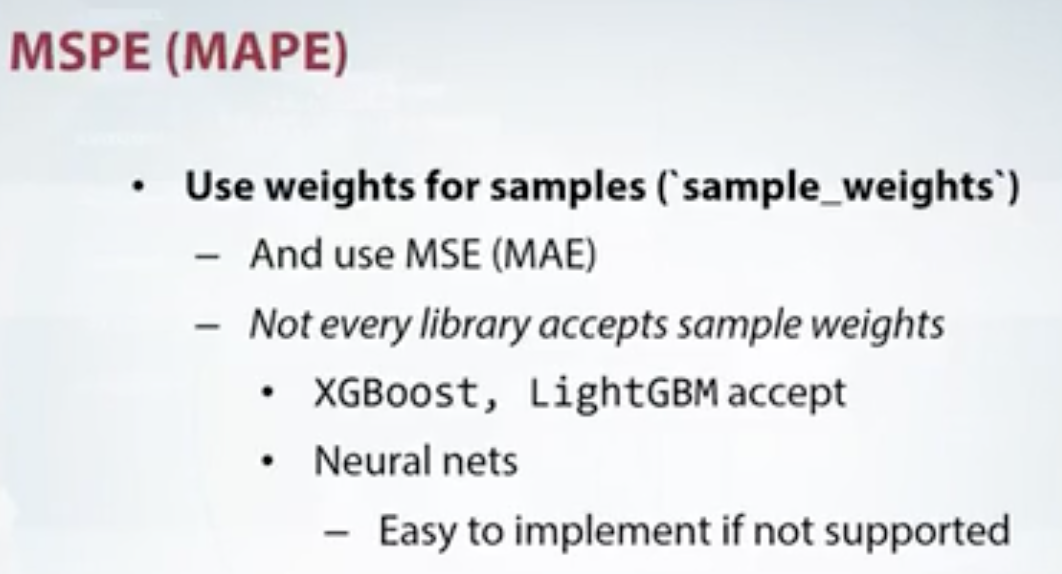


#### RMSLE
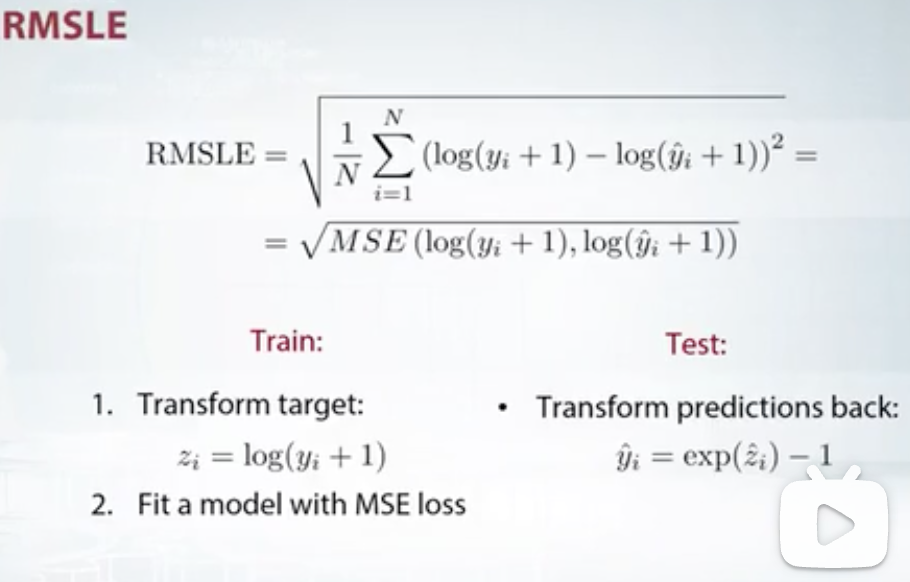
- Easy to optimize because of the connection with MSE loss.
- Need to first apply and transform to our target variable (in this case logarithm of the target + 1) [we denote the transformed target with `z` variable]
- We then fit a model with MSE loss
- To get prediction for a test subject, we first obtain the prediction, zhat, this will be in the logarithmic scale (eg by calling model.predict), then we do inverse transform from logarithmic scale back to the original by expatiating zhat and subtracting 1.

# What I learnt:
- MSE, RMSE are very common and implemented in many packages
- RMSPE and MAPE can be optimized by either resampling the dataset or setting proper sample weights
- RMSLE is optimized by optimizing MSE in log space